In [1]:
%run ../src/game.py
%run ../src/ipd.py
%run ../src/strategies.py
%run ../src/tools.py
dip =[(3,3),(0,5),(5,0),(1,1)]   # Dilemme du prisonnier



# Evaluation par synthèse de sous-classes

Les compétitions écologiques offrent un outil de mesure assez fiable de la robustesse d'une stratégies, mais encore insuffisant. Il se peut par exemple que certaines stratégies se sacrifient pour d'autres dans un schema *maitre-esclave*. Avoir une synthèse de centaines voir de milliers de compétitions écologiques dans lesquelles on a enlevé certaines stratégies mesure sans doute une meilleure robustesse. L'une des idées les plus simples consiste à calculer les n compétitions possibles que l'on peut faire en enlevant 1 stratégie à un ensemble de n stratégies. On appelle cette technique la technique des sous-classes.
Nous définissions ici 3 fonctions permettant de réaliser ces sous-classes.
- `subclasses(bag, n)` qui évalue tous les sous ensembles possibles de taille n dans la bage
- `subclassesWithOneStrat(bag, n, strat)` qui évalue Strat dans tous les sous ensembles possibles de taille n dans la bage en ajoutant systématiquement la stratégie strat
- `subclassesRandomWithOneStrat(p, bag, n, Strat)` qui réalise p competitions de n strategies choisies au hasard dans la bage dans lesquelles on rajoute systématiquement Strat

Les évaluations réalisées dans ces fonctions sont des compétitions écologiques.

Ces fonctions renvoient à la fin un tableau avec pour chaque stratégie, sa meilleure place, sa pire place, sa moyenne et son écart-type.

#### Un cas simple : toutes les compétitions de 3 stratégies parmi les classiques

In [2]:
All_C = Periodic('C')
All_D = Periodic('D')
bag = [All_C, All_D, Tft(), Spiteful(), Gradual(), SoftMajority(), HardMajority()]
subClasses(bag, 3)

          BestRank  WorstRank   RankAvg   RankStd
tft            1.0        2.0  1.133333  0.351866
softmajo       1.0        2.0  1.133333  0.351866
spiteful       1.0        2.0  1.266667  0.457738
gradual        1.0        2.0  1.333333  0.487950
per_C          1.0        3.0  1.400000  0.632456
per_D          1.0        3.0  2.533333  0.743223
hardmajo       2.0        3.0  2.666667  0.487950


#### Un cas plus volumineux : toutes les stratégies Mem(1,1) avec une stratégie en moins à chaque fois
Sachant qu'il y a 32 `mem(1,1)` cette opération réalise donc 32 compétitions de 31 stratégie. Notez que dans le cas de cette méthode, toutes les stratégies sont présentes (et absentes) exactement le même nombre de fois.


In [3]:
import time
before = time.time()
bag = getAllMemory(1,1)
subClasses(bag, len(bag)-1)
after = time.time()
print("Time : {}".format(after-before))

       BestRank  WorstRank   RankAvg   RankStd
CCDDD       1.0        1.0  1.000000  0.000000
CCDCD       1.0        2.0  1.967742  0.179605
CCDDC       2.0        3.0  2.935484  0.249731
CCDCC       2.0        4.0  3.838710  0.454369
CCCCC       2.0        5.0  4.806452  0.601074
CCCCD       2.0        5.0  4.806452  0.601074
CCCDC       2.0        5.0  4.806452  0.601074
CCCDD       2.0        5.0  4.806452  0.601074
CDCCC       2.0        5.0  4.806452  0.601074
CDCCD       2.0        5.0  4.806452  0.601074
CDCDC       2.0        5.0  4.806452  0.601074
CDCDD       2.0        5.0  4.806452  0.601074
CDDCC       2.0        5.0  4.806452  0.601074
CDDCD       2.0        5.0  4.806452  0.601074
CDDDC       2.0        5.0  4.806452  0.601074
CDDDD       2.0        5.0  4.806452  0.601074
DCCCC       2.0        5.0  4.806452  0.601074
DCCCD       2.0        5.0  4.806452  0.601074
DCCDC       2.0        5.0  4.806452  0.601074
DCCDD       2.0        5.0  4.806452  0.601074
DCDCC       2

#### Test de la stratégie Spiteful avec tous les triplets de classiques
Dans les cas des deux méthodes `subClassesWithOneStrat` seule la stratégie passée en paramètre participe à toutes les sous-classes (faisable pour des ensembles pas trop volumineux genre `mem(1,1)`). Dans la première elle participe à la totalité des sous-classes tandis qu'avec `subClassesRandomWithOneStrat` elle participe à un nombre fixé de sous classes de même taille mais prises aléatoirement (utilisable dans de gros ensembles comme `mem(2,2)`).

In [ ]:
All_C = Periodic('C')
All_D = Periodic('D')
bag = [All_C, All_D, Tft(), Gradual(), SoftMajority(), HardMajority()]
res  = subClassesWithOneStrat(bag, 3, Spiteful())
#Pour afficher le tableau en entier : 
#res = subClassesWithOneStrat(bag, 3, Spiteful(), True)

Il est à noter que les objets `subClassesWithOneStrat` et `subClassesRandomWithOneStrat` conservent le 
meilleur et le pire des tournois pour la stratégie `strat`
Au moment de l'affichage du classement des sous-classes il est de ce fait possible d'afficher l'ensemble de stratégies qui a été favorable ou défavorable à la stratégie `Strat`.

In [ ]:
meilleureComp, pireComp, strategy = res
print("La meilleure competition pour la stratégie "+strategy.name +" est : ")
for strat in meilleureComp :
    print(strat.name)

#### 100 experiences de 10 stratégies prise au hasard dans mem(2,2) contre Gradual()
Pour les `subclassesRandom`, si une stratégie n'a joué qu'une seule fois alors elle n'a pas d'écart-type (`NaN`); si elle n'a pas joué du tout alors toutes ses valeurs sont à `NaN` dans le tableau

In [32]:
bag = getAllMemory(2,2)
res = subClassesRandomWithOneStrat(100,bag, 10, Gradual())
#Pour afficher le tableau en entier : 
#subClassesRandomWithOneStrat(100, bag, 10, Gradual(), True)


Strategy ranking  : gradual
BestRank     1.000000
WorstRank    6.000000
RankAvg      2.340000
RankStd      1.182533
Name: gradual, dtype: float64


On peut d'ailleurs vérifier la compétition la plus "défavorable" à Gradual 
(comme c'est un choix aléatoire, donc 2 éxécutions ne donneront pas systématiquement le même résultat)

In [ ]:
bestComp, worstComp, strategy = res

In [ ]:
bag = worstComp
e2=Ecological(g,bag)
e2.run()
e2.drawPlot(None,None)
evol=e2.historic
print(evol.iloc[-1])
print(e2.historic.iloc[e2.generation].rank(0, method="min", ascending=False))

## Conception d'un méta-stratégie

Une méta-stratégie est une stratégie composée de plusieurs stratégies. 
Dans un premier temps, chaque stratégie joue pendant n tours et on comptabilise le nombre de points pour chaque stratégie pendant ces n tours.
On choisit ensuite la stratégie qui a le plus de points et on répète ce choix tous les n tours.
Pour écrire une méta-stratégie, on écrit `MetaStrategy(liste des stratégies, n)`

In [2]:
# check of MetaStrategy : the two results should be the same

# with Metastrat
metaStrat = MetaStrategy([Tft()], 5)
bag = getMem(1,1)
res  = subClassesWithOneStrat(bag,len(bag)-1, metaStrat)

# without Metastrat
res  = subClassesWithOneStrat(bag,len(bag)-1, Tft())


Strategy ranking  : metastrat
BestRank     1.000000
WorstRank    2.000000
RankAvg      1.968750
RankStd      0.176777
Name: metastrat, dtype: float64
Strategy ranking  : tft
BestRank     1.000000
WorstRank    2.000000
RankAvg      1.968750
RankStd      0.176777
Name: tft, dtype: float64


In [3]:
# check of MetaStrategy : the two results should be the same (with a Periodic)

metaStrat = MetaStrategy([Periodic("CCD")], 5)
res  = subClassesWithOneStrat(bag,len(bag)-1, metaStrat)

res  = subClassesWithOneStrat(bag,len(bag)-1, Periodic("CCD"))

Strategy ranking  : metastrat
BestRank     2.000000
WorstRank    5.000000
RankAvg      4.812500
RankStd      0.592289
Name: metastrat, dtype: float64
Strategy ranking  : per_CCD
BestRank     2.000000
WorstRank    5.000000
RankAvg      4.812500
RankStd      0.592289
Name: per_CCD, dtype: float64


### Tests de méta-stratégies
On cherche ici la meilleure meta-stratégie contre Memory(1,1) + Gradual.
On fait différents tests durant lesquels on change : 
- les stratégies
- le nombre de tours n.

On utilise pour cela les sous-classes `subClassesWithOneStrat` qui, pour une stratégie particulière (ici, notre meta-stratégie) fait plusieurs compétitions écologiques et mesure le meilleur rang, le pire rang, la rang moyen, et l'écart-type.

In [34]:
metaStrat = MetaStrategy([Tft(), Periodic("C"), Spiteful(), Periodic("CCD")], 5)
bag = getMem(1,1)+[Gradual()]
res  = subClassesWithOneStrat(bag,len(bag)-1, metaStrat, length = 100)



Strategy ranking  : metastrat
BestRank      5.000000
WorstRank    10.000000
RankAvg       7.909091
RankStd       2.067058
Name: metastrat, dtype: float64


In [36]:
metaStrat = MetaStrategy([Tft(), Periodic("C"), Spiteful(), Periodic("CCD")], 4)
bag = getMem(1,1)+[Gradual()]
res  = subClassesWithOneStrat(bag,len(bag)-1, metaStrat, length = 100)


Strategy ranking  : metastrat
BestRank      5.000000
WorstRank    10.000000
RankAvg       7.545455
RankStd       2.078024
Name: metastrat, dtype: float64


In [37]:
metaStrat = MetaStrategy([Tft(), Periodic("C"), Spiteful(), Periodic("CCD")], 3)
bag = getMem(1,1)+[Gradual()]
res  = subClassesWithOneStrat(bag,len(bag)-1, metaStrat, length = 100)


Strategy ranking  : metastrat
BestRank      5.000000
WorstRank    10.000000
RankAvg       7.181818
RankStd       2.053268
Name: metastrat, dtype: float64


In [45]:
metaStrat = MetaStrategy([Tft(), Periodic("C"), Spiteful(), Periodic("CCD")], 2)
bag = getMem(1,1)+[Gradual()]
res  = subClassesWithOneStrat(bag,len(bag)-1, metaStrat, length = 100)


Strategy ranking  : metastrat
BestRank     5.000000
WorstRank    6.000000
RankAvg      5.848485
RankStd      0.364110
Name: metastrat, dtype: float64


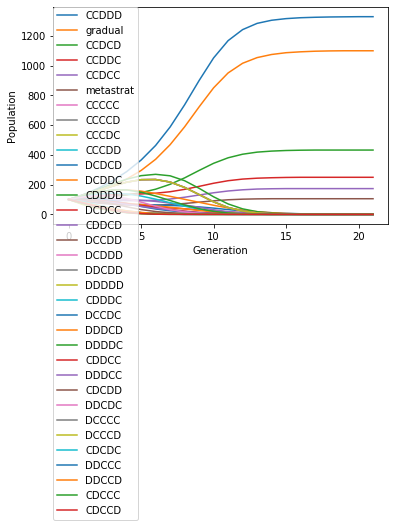

In [6]:
metaStrat = MetaStrategy([Tft(), Periodic("C"), Spiteful(), Periodic("CCD")], 1)
bag = getMem(1,1)+[Gradual()]

# Test avec les sous-classes
# res  = subClassesWithOneStrat(bag,len(bag)-1, metaStrat, length = 100)

# Test avec un tournoi
# t = Tournament(g,[metaStrat]+bag)
# t.run()
# print(t.matrix)
# print(t.matrix['Total'])

# Test avec une competition écolo
e = Ecological(g,[metaStrat]+bag)
e.run()
e.drawPlot(None,None)
#print(e.score)

In [35]:
metaStrat = MetaStrategy([Tft(), Spiteful(), Gradual()], 3)
bag = getMem(1,1)+[Gradual()]
res  = subClassesWithOneStrat(bag,len(bag)-1, metaStrat, length = 100)

Strategy ranking  : metastrat
BestRank      5.000000
WorstRank    10.000000
RankAvg       9.363636
RankStd       1.453835
Name: metastrat, dtype: float64


Conclusion : La meilleure méta-stratégie que l'on a trouvé est la Méta-stratégie composée des stratégies Tft(), Periodic('C'), Spiteful(), Periodic('CCD') avec un n=2 ou n=1.
Verifions maintenant si cette séquence de stratégies est optimal en testant toutes les séquences possibles

In [42]:
bag = getMem(1,1)+[Gradual()]
all = itertools.permutations([Tft(), Periodic("C"), Spiteful(), Periodic("CCD")])
for a in all : 
    print("Ordre")
    for strat in a : 
        print(strat.name)
    metaStrat = MetaStrategy(a, 2)
    res  = subClassesWithOneStrat(bag,len(bag)-1, metaStrat, length = 100)
    

Ordre
tft
per_C
spiteful
per_CCD
Strategy ranking  : metastrat
BestRank     5.000000
WorstRank    6.000000
RankAvg      5.848485
RankStd      0.364110
Name: metastrat, dtype: float64
Ordre
tft
per_C
per_CCD
spiteful
Strategy ranking  : metastrat
BestRank     5.000000
WorstRank    6.000000
RankAvg      5.848485
RankStd      0.364110
Name: metastrat, dtype: float64
Ordre
tft
spiteful
per_C
per_CCD
Strategy ranking  : metastrat
BestRank     5.000000
WorstRank    6.000000
RankAvg      5.848485
RankStd      0.364110
Name: metastrat, dtype: float64
Ordre
tft
spiteful
per_CCD
per_C
Strategy ranking  : metastrat
BestRank     5.000000
WorstRank    6.000000
RankAvg      5.848485
RankStd      0.364110
Name: metastrat, dtype: float64
Ordre
tft
per_CCD
per_C
spiteful
Strategy ranking  : metastrat
BestRank     5.000000
WorstRank    6.000000
RankAvg      5.848485
RankStd      0.364110
Name: metastrat, dtype: float64
Ordre
tft
per_CCD
spiteful
per_C
Strategy ranking  : metastrat
BestRank     5.000000


Après cette vérification les séquences de stratégies qui fournissent les moins bons résultats sont les séquences commençant par Periodic('CCD'), toutes les autres fournissent un meilleur résultat.


## Tests d'équivalence de stratégies

Les ensembles de stratégies que nous traitons sont parfois redondants : il contiennent les mêmes stratégies écrites de différentes manières. Il semble donc interessant de pouvoir simplifier des ensembles de stratégies en suprimant les doublons qu'ils peuvent contenir. 
Malheureusement, chacun le sait depuis Turing, l'équivalence de deux programmes est indécidable. Il n'y a donc pas de test parfait. Il est néanmoins possible de fournir des outils permettant d'avancer dans ce problème de simplification.


Pour savoir si deux stratégies sont différentes, il suffit de les faire jouer contre une stratégie de référence et s'assurer qu'elles jouent différemment face à cet adversaire. Evidemment selon la complexité de cette stratégie de référence, le test est plus ou moins efficace. Si les stratégies jouent la même chose, cela ne fait pas une preuve de leur équivalence. Ce test est semi-décidable : si les stratégies jouent différemment c'est sûr qu'elles sont différentes, mais si elles jouent de manière identique, c'est peut-etre que la stratégie de référence n'a pas sû révéler leur différence.
La fonction `testEquivUnit` réalise ce test. On lui passe un couple de stratégies à tester et uen stratégie de référence `opponent`, et elle compare ces deux stratégies durand `length` tours d'un meeting. Elle renvoie un booléen : équivalent ou pas.

In [32]:
def testEquivUnit(strategies, opponent, length):
    res = []
    for strat in strategies :
        m = Meeting(g, strat, opponent, length)
        m.run()
        res += [m.s1_score] 
        #print(res)
    return len(set(res)) == 1


print(testEquivUnit([Tft(), Spiteful()]  , Periodic("CCDCD"), 100))
print(testEquivUnit([Tft(), Mem(0,1,"cCD")],  Periodic("CCDCD"), 100))


False
True


Le choix de la stratégie de référence est important. Si elle est trop "faible", elle ne permet pas aux deux stratégies comparées de se "révéler" et indique alors qu'elles sont équivalentes alors qu'elles ne le sont pas, comme ci-dessous


In [40]:
testEquivUnit([Tft(), Spiteful()], Periodic('C'), 100)

True

Un test plus robuste pourrait être de les faire jouer contre Periodic('CCD'). Ce test montre bien que les deux stratégies ne sont pas équivalentes

In [42]:
testEquivUnit([Tft(), Spiteful()], Periodic('CD'), 100)

False

Afin d'améliorer cette comparaison de deux stratégies, il est préférable de les comparer non pas à une seule stratégie de référence, mais à un ensemble de stratégies de référence. On compare nos deux stratégies contre chaque élément de cet ensemble, ce qui constitue un test surement plus robuste. Bien évidemment dès que l'une de celles-ci indique une différence entre deux 2 stratégies, le test peut s'arrêter.
La fonction `testEquivMultiple` fonctionne comme précédemment, mais cette fois en cherchant à trouver une différence de comportement grâce à une liste d'opposants.

In [38]:
def testEquivMultiple(strategies, opponents, length):
    for opponent in opponents : 
        equiv = testEquivUnit(strategies, opponent, length)
        if equiv == False :
            return False
    return True

print(testEquivMultiple([Tft(), Spiteful()],[Periodic('CDCCDDC'), Periodic('DDCDCDD')], 10))

False


Pour simplifier un ensemble de stratégies, il suffit maintenant d'effectuer le test précédent sur tous les couples possibles. Les stratégies identifiées comme potentiellement équivalentes sont alors regroupées.
la fonction `classesEquiv(l, opponents, length)` effectue ce test sur l'ensemble `l`. Elle renvoie une dans une map les classes d'équivalence.
Par exemple si on a strat1 équivalente à strat2 et strat3 qui n'a pas d'équivalente, la fonction va renvoyer dans une map : `{strat1 : [strat2] , strat3 : []}`

L'ensemble des clés de cette Map constitue l'ensemble de stratégies simplifié.

In [53]:
def classesEquiv(l, opponents, length):
    m = dict()
    while len(l) > 0 :
        m[l[0]] = []
        ind = [0]
        for j in range(len(l[1:])):
            if testEquivMultiple([l[0], l[j + 1]], opponents, length):
                m[l[0]] += [l[j + 1]]
                ind += [j + 1]
        ltmp = []
        for i in range(len(l)):
            if i not in ind :
                ltmp += [l[i]]
        l = ltmp
    return m


# This function allows you to display the names of the strategies instead of the instance number.
def printCe(ce):
    for key in ce.keys() :
        if len(ce[key]) > 0:
            print("\n" + key.name + " : " , end =" " )
        else :
            print("\n"+ key.name + ": []"  , end =" ")
        for value in ce[key]:
            print(value.name , end =" ")
    print(" ")
    
    
L = [Tft(), Spiteful(), Mem(0,1,"cCD"),  Mem(1,1,"cCDDD"), Periodic("CDC") ]
ce = classesEquiv(L, [Periodic('CDCCDDC'), Periodic('DDCDCDD')], 10)
printCe(ce)
print(len(ce.keys()))


tft :  cCD 
spiteful :  cCDDD 
per_CDC: []  
3


On rappelle que la qualité de cette simplification dépend très fortement de la qualité de la liste de référence. On le constate aisément en tentant de simplifier `mem(1,2)` face à une liste de plus en plus grande de stratégies de référence.


In [59]:
# Mem(1,2) contains 1024 strategies

# Without any opponent, they are all considered equivalent.
ce = classesEquiv(getMem(1,2), [], 10)
print(len(ce.keys()))

# Comparing with simply ALL_C , only 9 different strategies are available
ce = classesEquiv(getMem(1,2), [All_C], 10)
print(len(ce.keys()))

# On renforce peu à peu le test
ce = classesEquiv(getMem(1,2), [All_C, Periodic('CDCCDDC'), Periodic('DDCDCDD')], 10)
print(len(ce.keys()))

ce = classesEquiv(getMem(1,2), [All_C, Periodic('CDCCDDC'), Periodic('DDCDCDD'),Gradual()], 10)
print(len(ce.keys()))

# Et donc ? Quelle est vraiment la taille de cet ensemble simplifié ?


1
9
472
622


On peut encore renforcer le test en commençant par faire jouer toputes les startégies de l'ensemble à tester entre elles. Bien évidemment si des stratégies sont identiques, elles doivent avoir le même score dans ce tournoi. On peut donc se contenter de tester les équivalences sur les ensembles de stratégies qui obtiennent en Tournoi un score identique. Rajouter cette équivalence des scores renforce encore un peu plus notre test.
Bien évidemment ceci se fait au détriment du temps de calcul.
La fonction `simplify` effectue ce travail. Elle fonctionne comme précédemment mais démarre par un tournoi afin d'identifier les paquets de stratégies ayant le même score. On concatène ensuite chacune des Map

In [63]:
def simplify(l, opponents, length):
    scores = dict()
    t = Tournament(g, opponents + l, length)
    t.run()
    res = t.matrix['Total']
    for strat in l : 
        score = res[strat.name]
        if score not in scores :
            scores[score] = [strat]
        else : 
            scores[score] += [strat]
    
    simplified = []
    d = dict()
    for item in scores.values():
        if len(item) > 1 :
            res = classesEquiv(item, opponents, length)
            for it in res.keys():
                if len(res[it]) > 0 :
                    d[it] = res[it]
            simplified += res.keys()
        else : 
            simplified += item
   
    return simplified, d


def printSimplify(res):
    strats, m = res
    print("Simplified list : " , end =" " )
    
    print(" ")
    print("Map of equivalences : ")
    printCe(m)
    
def printStrats(strats):
    for strat in strats:
        print(strat.name , end =" " )
    
        
strats, m = simplify(getMem(1,2), [All_C, Periodic('CDCCDDC'), Periodic('DDCDCDD'),Gradual()], 10)
print(len(strats))

# RECORD BROKEN! 820... but this test remains undecidable, it is nevertheless subject to a doubt... 
        
    

820


In [31]:
Mem11 = getMem(1,1)
Mem12 = getMem(1,2)
Mem21 = getMem(2,1)
Mem22 = getMem(2,2)

#res11 = classesEquiv(Mem11, [Periodic('CDCCDDC'), Periodic('DDCDCDD'),Gradual()], 10)
res12 = classesEquiv(Mem12, [Periodic('CDCCDDC'), Periodic('DDCDCDD'),Gradual(),Periodic("CDCDCDDDDDDDCCDDCCDD"),HardMajority(),SoftMajority(),Periodic("CCCDDDCCDDCCDDDCCDCDCDCD"),Periodic("DDDCDCDCCDDCCDDCCCD")], 30)
#res21 = classesEquiv(Mem21, [Periodic('CDCCDDC'), Periodic('DDCDCDD'),Gradual()], 10)
#res22 = classesEquiv(Mem22, [Periodic('CCD'), Periodic('DDC')], 10)

tab = pd.DataFrame(
        np.nan, ["Mem 1 1", "Mem 1 2", "Mem 2 1", "Mem 2 2"], ["All strategies", "After simplify"]
    )
tab.at["Mem 1 1", "All strategies" ] = len(Mem11)
tab.at["Mem 1 2", "All strategies" ] = len(Mem12)
tab.at["Mem 2 1", "All strategies" ] = len(Mem21)
tab.at["Mem 2 2", "All strategies" ] = len(Mem22)
tab.at["Mem 1 1", "After simplify" ] = len(res11)
tab.at["Mem 1 2", "After simplify" ] = len(res12)
tab.at["Mem 2 1", "After simplify" ] = len(res21)
#tab.at["Mem 2 2", "After simplify" ] = len(res22)

tab

,All strategies,After simplify
Mem 1 1,32.0,26.0
Mem 1 2,1024.0,786.0
Mem 2 1,1024.0,302.0
Mem 2 2,262144.0,NaN


Petite vérification

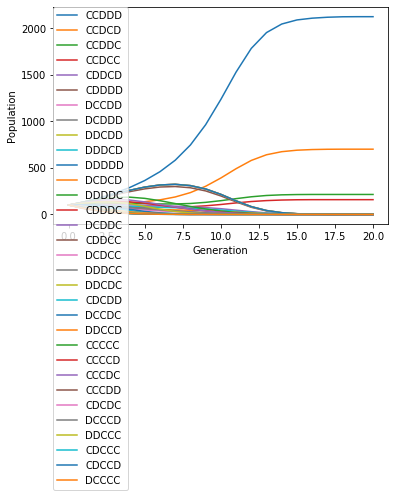

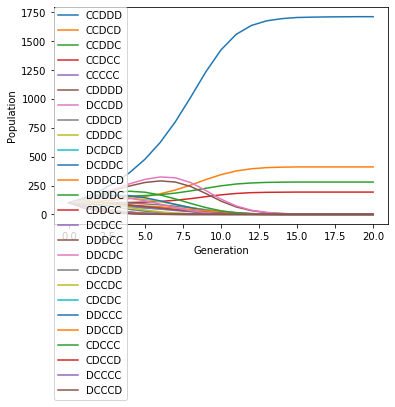

In [16]:
simpl, _ = simplify(getMem(1,1), [Periodic('CDCCDDC'), Periodic('DDCDCDD')], 10)
e1 = Ecological(g, getMem(1,1))
e1.run()
e1.drawPlot(None,None)

e2 = Ecological(g, simpl)
e2.run()
e2.drawPlot(None,None)



In [ ]:
def rec_simplify(l, opponents, length, batchSize):
    size = len(l)
    strats = []
    simplified = set()
    for i in range(int(size/batchSize)):
        strats += l[i * batchSize : (i+1) * batchSize]
        res, _  = simplify(strats, opponents, length)
        print("{} strategies deleted".format(len(strats) - len(res)))
        for strat in res :
            simplified.add(strat)
        strats = list(simplified)
    return simplified


        
printStrats(rec_simplify([Tft(), Spiteful(), Mem(0,1,"cCD"),  Mem(1,1,"cCDDD"), Periodic("CDC"), Periodic('C') ], [Periodic('CCD'), Periodic('DDC')] , 10, 2))
print(" ")
rec_simplify(getMem(1,2), [Periodic('CCD'), Periodic('DDC')] , 10, 32)

0 strategies deleted
2 strategies deleted
0 strategies deleted
per_CDC spiteful tft per_C  
27 strategies deleted
15 strategies deleted
21 strategies deleted
25 strategies deleted
6 strategies deleted
1 strategies deleted
7 strategies deleted
13 strategies deleted
3 strategies deleted
5 strategies deleted
5 strategies deleted
15 strategies deleted
4 strategies deleted
8 strategies deleted
11 strategies deleted
16 strategies deleted
23 strategies deleted
14 strategies deleted
6 strategies deleted
1 strategies deleted
6 strategies deleted
0 strategies deleted
6 strategies deleted
0 strategies deleted
2 strategies deleted


## Dilemme spatial (en cours)

In [10]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import random

# Input variables for the board
boardsize = 10   # board will be X by X where X = boardsize
my_board = np.empty((boardsize, boardsize), dtype=float)


# 0 : cooperator
# 1 : new cooperator
# 2 : defector   
# 3 : new defector


# Some helper functions
def init_strategies():
    strategies = np.zeros((boardsize, boardsize), dtype=object)
    for i in range(boardsize) :
        for j in range(boardsize):
            strategies[i, j] = 0
    strategies[5, 5] = 2
    return strategies
    
# Initialize the board with starting positions
# def strategies_to_board(strategies):
#     for i in range(boardsize) :
#         for j in range(boardsize) :
#             if strategies[i, j] == "C":
#                 my_board[i , j] = 0
#             else : 
#                 my_board[i, j] = 1
#     #print("-------------------------")
#     #print(strategies)
#     #print(my_board)
#     #print("--------------------------------")"
#     return my_board
    

# https://github.com/evoplex/model-prisonersDilemma
def update_strategies():
    scores = play()
    strategies = np.copy(update(scores))
    #print(strategies)
    return strategies

def play():
    scores = np.zeros((boardsize, boardsize))
    for i in range(boardsize):
        for j in range(boardsize):
            score = 0
            #cpt = 0
            score += getScore(strategies, i, j, i, j)
            if i >= 0 and j >= 0:
                score += getScore(strategies, i, j, i-1, j-1)
                #cpt += 1
            if j >= 0:
                score += getScore(strategies, i, j, i, j-1)
                #cpt += 1
            if i >= 0 :
                score += getScore(strategies, i, j, i-1, j)
                #cpt += 1
            if i < boardsize - 1 and j < boardsize - 1 :
                score += getScore(strategies, i, j, i+1, j+1)
                #cpt += 1
            if i < boardsize - 1 :
                score += getScore(strategies, i, j, i+1, j)
                #cpt += 1
            if j < boardsize -1 :
                score += getScore(strategies, i, j, i, j+1)
                #cpt += 1
            if i < boardsize - 1 and j >= 0:
                score += getScore(strategies, i, j, i+1, j-1)
                #cpt += 1
            if i >= 0 and j < boardsize - 1 :
                score += getScore(strategies, i, j, i-1, j+1)
                #cpt += 1
            scores[i][j] = score
    #print(scores)
    return scores

def update(scores):
    #print(scores)
    new_strategies = np.zeros((boardsize, boardsize), dtype=object)
    for i in range(boardsize):
        for j in range(boardsize):
            best = scores[i][j]
            ind_i = i 
            ind_j = j
            if i >= 0 and j >= 0:
                if scores[i-1][j-1] > best :
                    best = scores[i-1][j-1]
                    ind_i = i - 1
                    ind_j = j - 1
            if j >= 0:
                if scores[i][j-1] > best :
                    best = scores[i][j-1]
                    ind_i = i 
                    ind_j = j - 1
            if i >= 0 :
                if scores[i-1][j] > best :
                    best = scores[i-1][j]
                    ind_i = i - 1
                    ind_j = j 
            if i < boardsize - 1  and j < boardsize - 1 :
                if scores[i+1][j+1] > best :
                    best = scores[i+1][j+1]
                    ind_i = i + 1
                    ind_j = j + 1
            if i < boardsize - 1:
                if scores[i+1][j] > best :
                    best = scores[i+1][j]
                    ind_i = i + 1
                    ind_j = j 
            if j < boardsize - 1:
                if scores[i][j+1] > best :
                    best = scores[i][j+1]
                    ind_i = i 
                    ind_j = j + 1
            if i < boardsize - 1 and j >= 0:
                if scores[i+1][j-1] > best :
                    best = scores[i+1][j-1]
                    ind_i = i + 1
                    ind_j = j - 1
            if i >= 0 and j < boardsize - 1:
                if scores[i-1][j+1] > best :
                    best = scores[i-1][j+1]
                    ind_i = i - 1
                    ind_j = j + 1

                    
            # new cooperator
            if (strategies[i][j] > 1) and (strategies[ind_i][ind_j] < 2):
                new_strategies[i][j] = 1
            # new defector
            if (strategies[i][j] < 2) and (strategies[ind_i][ind_j] > 1):
                new_strategies[i][j] = 3
            else : 
                new_strategies[i][j] = strategies[ind_i][ind_j]
    return new_strategies
            

def getScore(strategies, i, j, k, l):
    s1 = strategies[i][j]
    s2 = strategies[k][l]
    res = binarize(s1) * 2 + binarize(s2)
    if res == 0:# CC 
        return 1
    elif res == 1 :# CD 
        return 0
    elif res == 2:# DC 
        return 1.9
    else :  # DD 
        return 0
    
def binarize(strategy):
    if strategy < 2:
        return strategy
    else :
        return strategy - 2


# def update_board(my_board):
#     strategies = np.copy(update_strategies())
#     print(strategies)
#     my_board = np.copy(strategies_to_board(strategies))
#     print(my_board)
#     return my_board




# Initialize the board
strategies = init_strategies()
print(strategies)
strategies = np.copy(update_strategies())
print(strategies)
# my_board = strategies_to_board(strategies)

##### Animate the board #####
# This will throw an error the first time you run the code, but the program will run properly if you
# execute the cell again (there is an error with the animation package that I cannot seem to get rid of)

# # Required line for plotting the animation
# %matplotlib notebook
# # Initialize the plot of the board that will be used for animation
# fig = plt.gcf()
# # Show first image - which is the initial board
# im = plt.imshow(my_board)
# plt.show()


# # Helper function that updates the board and returns a new image of
# # the updated board animate is the function that FuncAnimation calls
# def animate(frame):
#     im.set_data(update_board(my_board))
#     return im,

# # This line creates the animation
# anim = animation.FuncAnimation(fig, animate, interval=50)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


## Bibliographie
- Evolutionary games and spatial chaos, Martin A. Nowak & Robert M. May 